# Linear regression in Scikit -Learn

Scikit-learn is machine learning library for Python. It includes implementation of many machine learning algortihms such as clustering, classification and regression algorithms. Documentation of scikit-learn http://scikit-learn.org/stable/index.html gives an overview of all the algorithms available in this library.

Before we implement our first linear regression model, we will introduce a new
dataset, the Housing Dataset, which contains information about houses in the
suburbs of Boston collected by D. Harrison and D.L. Rubinfeld in 1978. The Housing
Dataset has been made freely available and can be downloaded from the UCI machine
learning repository at https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Specifically, your goal will be to use this data to **learn/ train** a linear model that will allow to make predictions about the monetary value of a home, knowing some particular features.  
You will predict the median value of owner occupied hauses ('MEDV') based on the available features in the dataset, such as average number of rooms per dwelling, etc.. Since the target variable here is quantitative, this is a regression problem.
Moreover, you will evaluate the trained model.

### Task 0: Importing necessary modules

Import numpy and pandas as their standard aliases, as well scikit-learn library (sklearn).


In [32]:
import numpy as np
import pandas as pd
import sklearn

### Task 1: Reading the data


Before staring to build and train a linear model for houses price prediction with sklearn, you need to:
- import the data provided as 'housing.csv' (HINT: pd.read_csv())
- get a quick inspection of the data unsing known pandas methods

In [33]:
data = pd.read_csv('housing.csv')
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [5]:
# n = 500
# beta_0 = 5
# beta_1 = 2
# beta_2 = -1

###  Task 2a: Exploring the housing data

As always, it is important to explore your data before building models.
* Use the pandas data frame methods to get informations about the size and the form of the dataset
* Get a statistical summary of the dataset

* Create a scatterplot matrix that allows us to visualize the pair-wise correlations a subset of features ( 'RM','LSTAT', 'PTRATIO', 'MEDV') in this dataset in one place.
* To plot the scatterplot matrix, we will use the pairplot function from the seaborn library
(http://stanford.edu/~mwaskom/software/seaborn/), which is a Python library for drawing statistical plots based on matplotlib

In [2]:
# # ~ 3 lines of code
# x_1 = 10*np.random.rand(500)
# x_2 = 10*np.random.rand(500)

In [3]:
# np.random.rand?

In [6]:
# y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + np.random.rand(500)

In [7]:
# x = np.stack([x_1, x_2],axis =1)

In [8]:
# x.shape

(500, 2)

In [10]:
# from sklearn.linear_model import LinearRegression

In [12]:
# lm = LinearRegression(fit_intercept=True)

In [13]:
# lm = lm.fit(x,y)

In [14]:
# lm.coef_

array([ 2.00542821, -1.00078367])

In [15]:
# lm.intercept_

5.477741990996586

In [19]:
# x_test = np.array([2,4])
# x_test.shape

(2,)

In [21]:
# x_test.reshape(1,-1)
# type(x_test)

numpy.ndarray

In [23]:
# y_test = lm.predict(x_test.reshape(1,-1))
# y_test

array([5.48546373])

In [24]:
# lm.score(x,y)  # R square -> 0 is bad, 1 is good

0.9980853490082369

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


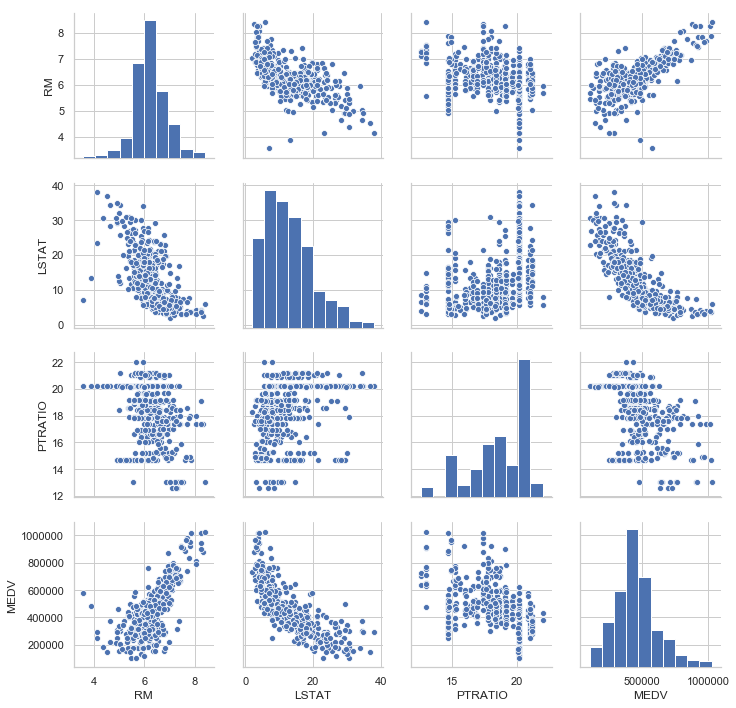

In [34]:
import seaborn as sns
sns.set (style = 'whitegrid', context = 'notebook')
_ = sns.pairplot(data, size = 2.5 )

###  Task 2b: Calculate statistics of the target variable
 Store the 'MEDV' in a variable 'prices'.
 Calculate the minimum, maximum, mean, median, and standard deviation of 'MEDV', which is stored in `prices`.
  - Store each calculation in their respective variable.
 These statistics will be extremely important later on to analyze various prediction results from the constructed model. 
 Use numpy library  to perform the necessary calculations.

In [ ]:
#  Minimum price in the data
minimum_price = None

# Maximum price in the data
maximum_price = None

#  Mean price in the data
mean_price = None

#  Median price in the data
median_price = None

# Standard deviation of prices in the data
std_price = None

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

### Task 3:  Feature Observation

As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**



###### Your answer:



### Task 3: Preparing the data as input for sklearn 

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, you will need to separate the dataset into **features** and the **target variable**. They must be nupy array as input for sklearn API.


The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. 

To fit a linear regression model, we are interested in those features that have a high
correlation with our target variable MEDV. Looking at the preceding correlation
matrix, we see that our target variable MEDV shows the largest correlation with
the LSTAT variable (-0.74). However, as you might remember from the scatterplot
matrix, there is a clear nonlinear relationship between LSTAT and MEDV. On the
other hand, the correlation between RM and MEDV is also relatively high (0.70) and
given the linear relationship between those two variables that we observed in the
scatterplot, RM seems to be a good choice for an exploratory variable to introduce
the concepts of a simple linear regression model in the following section.

-  store the 'RM' feature in a variable X
-  store the 'MEDV' feature in a variable y
-  reshape the resulted arrays using the .numpy .reshape() method, passing (-1,1) as argument.

In [49]:
x = data['RM'].values  # features matrix
print(x.shape)
print(type(x))
y = np.array(data['MEDV']) # target vector
print(y.shape)
print(type(y))
x = np.expand_dims(x, -1)
# x.reshape(-1,1)
x.shape
# y.reshape(-1,1)
y = np.expand_dims(y, -1)


(489,)
<class 'numpy.ndarray'>
(489,)
<class 'numpy.ndarray'>


In [50]:
np.newaxis?

### Task 5: Fit a linear regression model 

To fit a linear regression model, we are interested in those features that have a high
correlation with our target variable MEDV. Looking at the preceding correlation
matrix, we see that our target variable MEDV shows the largest correlation with
the LSTAT variable (-0.74). However, as you might remember from the scatterplot
matrix, there is a clear nonlinear relationship between LSTAT and MEDV. On the
other hand, the correlation between RM and MEDV is also relatively high (0.70) and
given the linear relationship between those two variables that we observed in the
scatterplot, RM seems to be a good choice for an exploratory variable to introduce
the concepts of a simple linear regression model in the following section.

Now, you will fit a linear regression and predict the value of a houses using just one feature.  In this exercise, you will use the 'RM' feature of *the housing* dataset. Since the goal is to predict houses' value, the target variable here is 'MEDV'. 


In [47]:
# import from sklerarn.linear_model the  Linear Regression module
from sklearn.linear_model import LinearRegression

In [48]:
# create a linear regression object
lm = LinearRegression(fit_intercept=True)

In [51]:
# use the fit method on your lm object to train the model, providing as arguments the feature and target 
_ = lm.fit(x,y)

In [52]:
# get the coeficients of your model using the coef_ attribute of your trained model
lm.coef_

array([[179098.59189784]])

In [53]:
# compute and print the R2 score using sckit-learn's .score() method.
lm.score(x,y)

0.48610069787324506

### Question 7 - Predicting Selling Prices

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [ ]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(lm.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

## PART II
### Train/test split for regression

Train and test sets are vital to ensure that the supervised learning model is able to generalize well to new data. This is equally true for linear regression models, as for classification  models.

In this task, you will split the housing dataset into training and testing sets, and then fit and predict a linear regression over **all features**. In addition to computing the **R2** score, you will also compute the **Root Mean Squared Error (RMSE)**, which is another commonly used metric to evaluate regression models. 

* Import mean_squared_error from sklearn.metrics, and train_test_split from sklearn.model_selection.
* Create feature and target arrays X (all features excepting 'MEDV') and y ('MEDV')
* Using train_test_split(X,y), create training and test (X_train, X_test, y_train, y_test) sets such that 30% is used for testing and 70% for training. Use a random state of 42.
* Create a linear regression regressor called *reg_all*, fit it to the training set, and evaluate it on the test set.
* Compute and print the R2 score using the *.score()* method on the test set.
* Compute and print the *RMSE*. To do this, first compute the Mean Squared Error using the *mean_squared_error()* function with the arguments *y_test* and *y_pred*, and then take its square root using *np.sqrt()*.

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
y = None
X = None # HINT use .drop with the data drop the column 'MEDV'

In [ ]:
X_train, X_test, y_train, y_test = None
print(X_train.shape)
print(y_train.shape)

In [ ]:
# Create lin reg obj
reg_all = None

In [ ]:
# fit the regressor on the data

In [ ]:
# predict on test data
y_pred = None

In [ ]:
# Compute and print R^2 score and RMSE
R_2 = None                  # Hint use .score on regressor object with X_test. y_test

print('R^2: {}'.format())

# Compute and print rmse
rmse